# Ковальчуков Александр

#### Математическая робототехника и искусственный интеллект

# Задача 1


### DTMF технология



In [1]:
from scipy.fftpack import fft, ifft, fftshift
import numpy as np
import matplotlib.pyplot as plt

keys = ['1','2','3','4','5','6','7','8','9','*','0','#']
rowTones = np.array([697, 770, 852, 941]);
colTones = np.array([1209, 1336, 1477]);
fs = 8000
ts = 1/8000

phoneNumber = '89057428569'
phoneNumber = list(phoneNumber)
phoneNumber

['8', '9', '0', '5', '7', '4', '2', '8', '5', '6', '9']

In [2]:
def mySNR(sig,noise):
    return 10*np.log10(np.sum(np.abs(sig)**2)/np.sum(np.abs(noise)**2))

In [3]:
def myDFT_AmplPlot(t, x, N=512, fs = False, xLim = 0.5):

    if len(x)>512:
        N = len(x)

    xFFT = fftshift(fft(x, N))
    # Амплитуда спектра
    xA = np.abs(xFFT)

    xList = [x, xA]
    titles = ['Сигнал', 'Спектр']

    # Графики
    plt.figure(figsize=(12, 6))
    for i, sig in enumerate(xList):
        plt.subplot(2, 2, i+1)
        plt.title(titles[i])
        if i == 0:
            plt.plot(t, sig)
            plt.xlabel('Временные отсчёты')
            #plt.xlim([-0.25, len(x)-0.75])
        else:
            if fs == False:
                plt.plot(np.arange(-np.floor(N/2), np.floor((N+1)/2))/N,sig)
                plt.xlabel('Частотные отсчёты')
                plt.xlim([0, xLim])
                plt.xticks(np.linspace(0, xLim, 11))
            else:
                plt.plot(fs*np.arange(-np.floor(N/2), np.floor((N+1)/2))/N,sig)
                plt.xlabel('Частоты')
                plt.xlim([0, fs*xLim])
                plt.xticks(np.linspace(0, fs*xLim, 11))
        plt.grid()
    plt.tight_layout()

In [4]:
def encode(phoneNumber):
    y = [0]
    for char in phoneNumber:
        try :
            i = keys.index(char)
        except ValueError as e:
            print(e)
            continue
        ind1 = rowTones[(i)//3] #row
        ind2 = colTones[(i)%3] #column
        #print(ind1,',',ind2)
        # длительность нажатия
        dur1=0.3
        #dur1=0.3 + 0.2*np.random.uniform(-1/2,1/2);
        # длительность тишины
        dur2=0.15
        #dur2=0.15 + 0.1*np.random.uniform(-1/2,1/2);

        t = np.arange(0,dur1,ts)
        sig = np.sin(2*np.pi*ind1*t) + np.sin(2*np.pi*ind2*t)    
        n = int(dur2*fs)

        y = y + list(sig) + [0] * n
        
    y_orig = y
    y = np.array(y) + 0.5 * np.random.randn(len(y))
    print('SNR: ', mySNR(y_orig, y))
    return y

SNR:  -1.4035444877664085


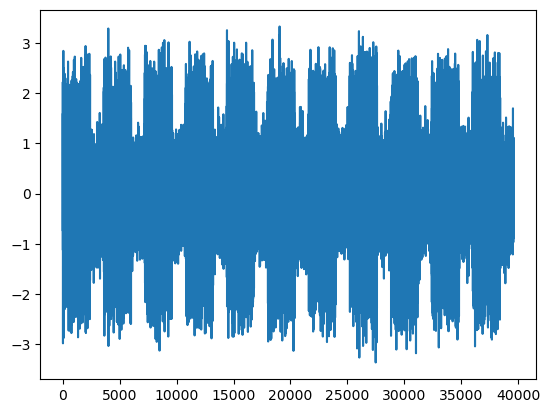

In [5]:
y = encode(phoneNumber)
plt.plot(y)

In [6]:
import IPython
from scipy.io import wavfile
IPython.display.Audio(y,rate=fs)

Как обнаружить закодированные частоты?

**В папке signals есть 10 тестовых сигналов, которые надо раскодировать и понять, какой номер был набран.**

#### Посмотрим на длительности файлов

In [7]:
for i in range(10):
    fs, sig = wavfile.read('signals\phoneNumber'+str(i)+'.wav')
    length = sig.shape[0] / fs
    print(fs, sig.shape[0], length)

8000 39948 4.9935
8000 39240 4.905
8000 38263 4.782875
8000 38863 4.857875
8000 40509 5.063625
8000 41461 5.182625
8000 39807 4.975875
8000 35829 4.478625
8000 37857 4.732125
8000 39364 4.9205


#### Длительность разная. Взглянем на сигналы. Может быть цифры набираются с равным промежутком?

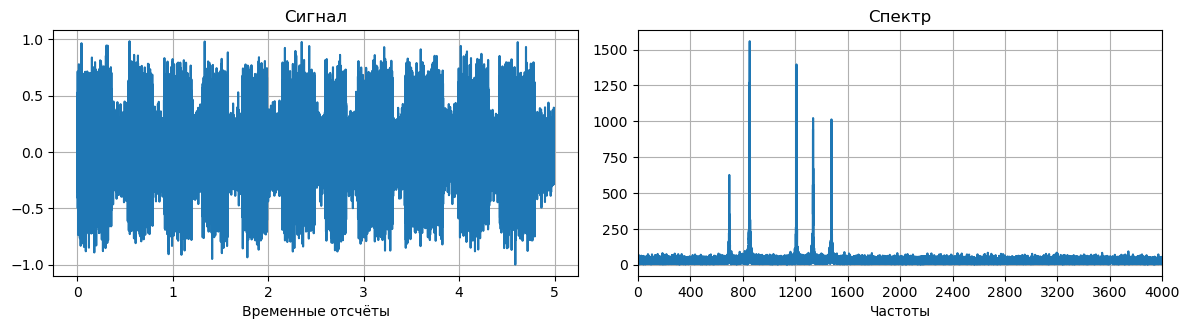

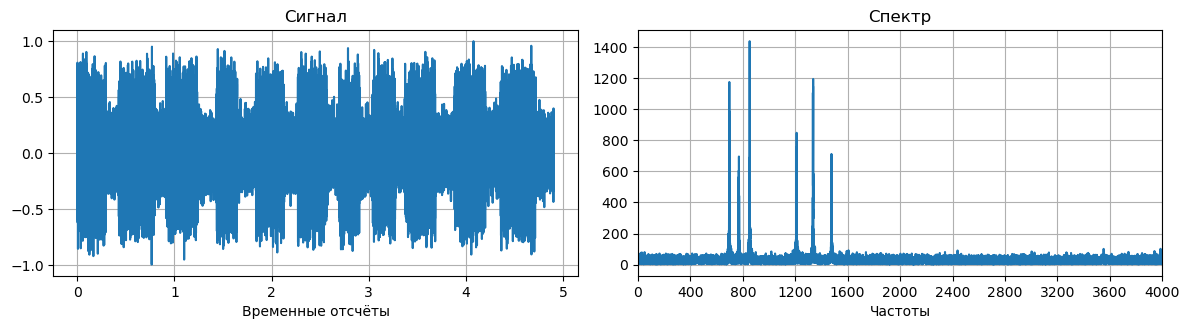

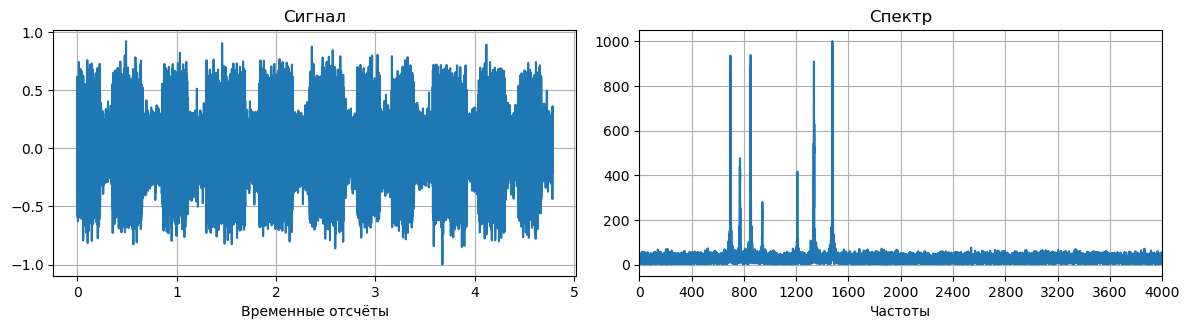

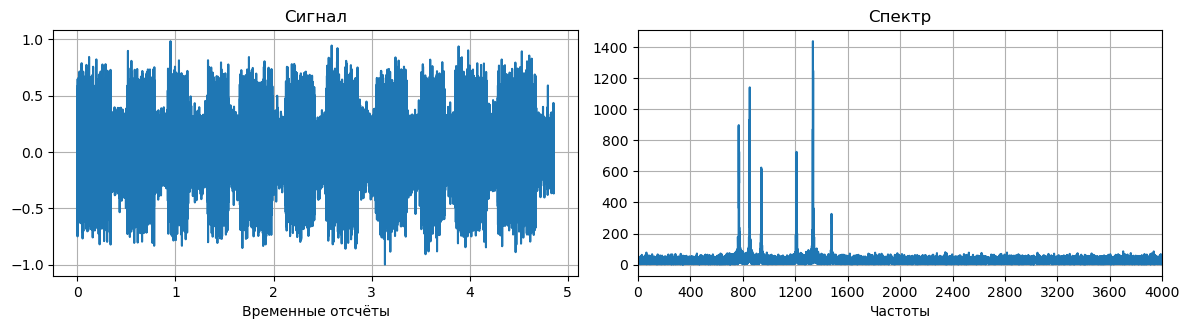

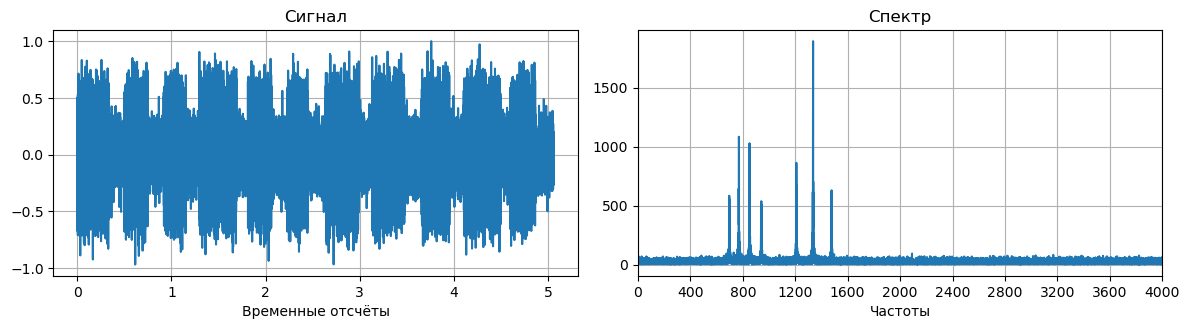

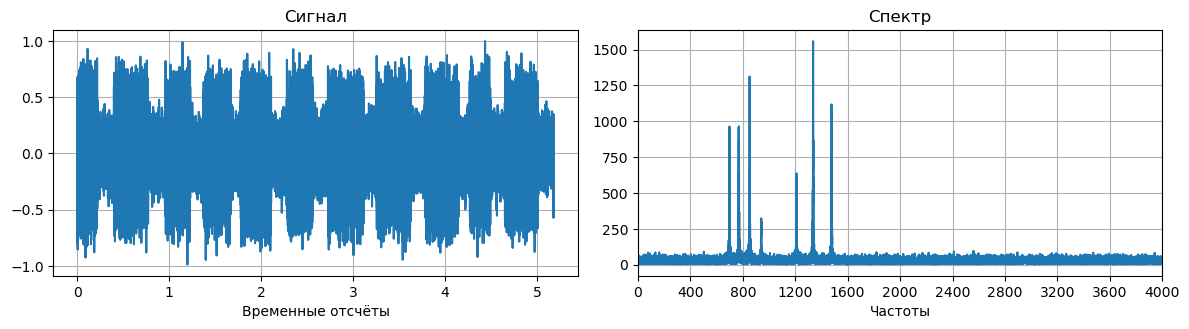

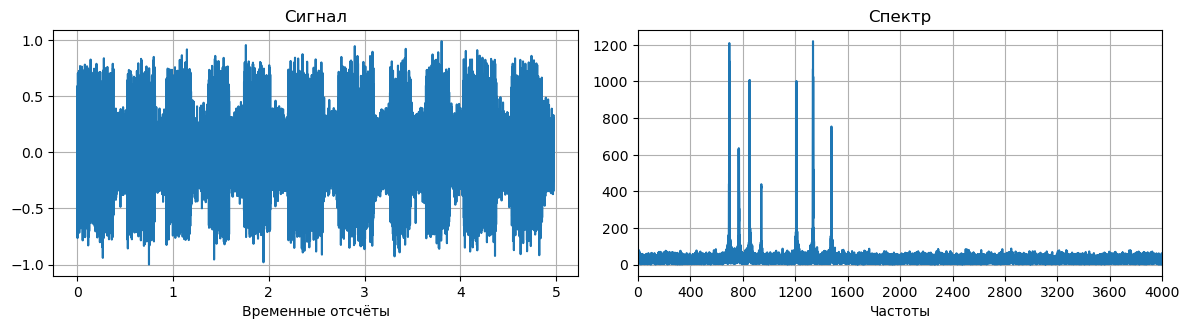

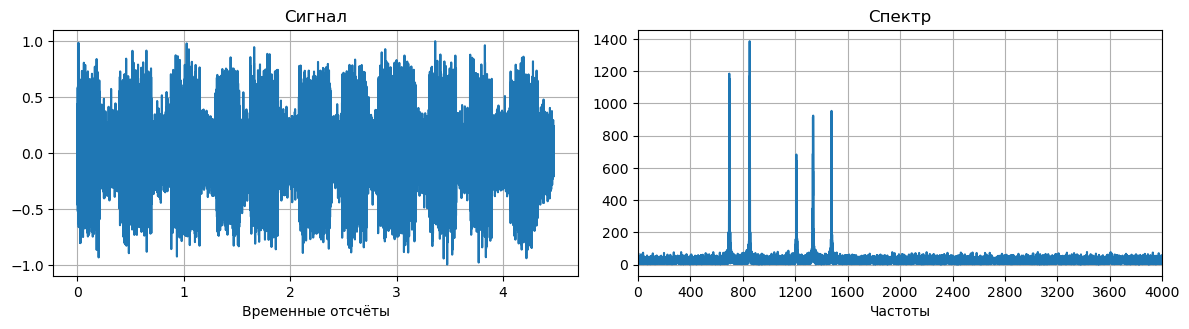

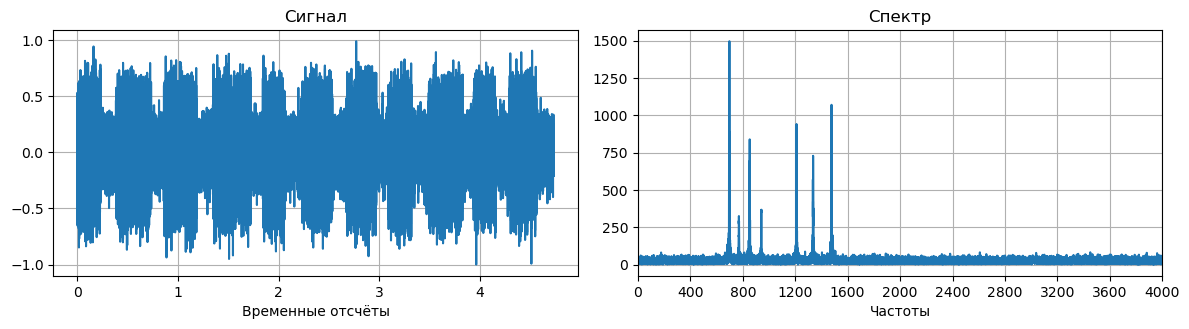

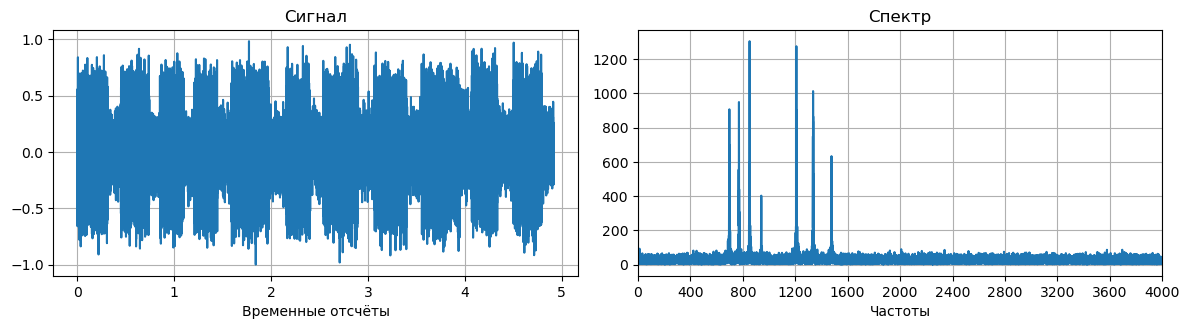

In [8]:
sample_count = 100
for i in range(10):
    fs, sig = wavfile.read('signals\phoneNumber'+str(i)+'.wav')
    sig = np.array(sig)
    N = sig.shape[0]
    duration = N / fs

    t = np.linspace(0, duration, N)
    myDFT_AmplPlot(t=t, x=sig, fs=fs)

#### Тоже мимо. Будем делить сигнал на семплы и надеяться, что две цифры не попадут в один семпл.

In [16]:
sampleN = 500
xLim = 2000
for i in range(10):
    fs, sig = wavfile.read('signals\phoneNumber'+str(i)+'.wav')
    sig = np.array(sig)
    N = sig.shape[0]
    duration = N / fs
    amp = np.abs(fftshift(fft(sig)))
    for k in range(int(N / sampleN)):
        sample = sig[k*sampleN : (k+1)*sampleN]
        sampleA = np.abs(fftshift(fft(sample)))
        '''
        посчитаем что-то вроде скошенности.
        По идее, готовый метод для скошенности есть в scipy, но за ним надо лезть в документацию
        '''
        ratio = np.mean(sampleA) / np.median(sampleA)
        if ratio > 1.2:
            print("+", end='')
        else:
            print(".", end='')
    print()

++++++..+++++.+++++..++++..+++++..++++++.++++..++++++..++++++...+++++.+++++++..
+++++..++++++..+++++...++++..+++++..+++++..++++.+++++.+++++...+++++...++++++..
++++.++++++...++++..+++++++..++++++..++++++..++++.+++++..++++++.+++++..++++.
++++++..+++++..+++...++++.++++++..+++++.++++++...+++++..++++.++++++.+++++++..
++++++..++++..+++++.+++++++..++++...+++...++++++..++++++..++++++..++++++.+++++...
++++..++++++...+++++..+++++.++++++..+++++..+++++++..++++++..+++++++.++++..++++++..
++++++..+++++..++++...++++..+++++..++++++..+++++++..++++..++++...+++++..++++++.
++++..+++++...+++++..++++.++++...+++++..++++.++++++..++++..++++..+++++.
++++..++++++..+++++..+++++++.++++..++++++.++++++.++++..++++++..++++.+++++..
+++++..+++++.+++++.++++..+++++++..+++++.+++++++..++++++..++++++..+++++..+++++.


#### Видно, что получилось классифицировать семплы на шум и не шум, и в каждом номере ровно 11 полезных интервалов.

#### Напишем декодер для семпла

In [10]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

In [11]:
rowTones = np.array([697, 770, 852, 941])
colTones = np.array([1209, 1336, 1477])
numbers = [['1', '2', '3'],
           ['4', '5', '6'],
           ['7', '8', '9'],
           ['*', '0', '#']]

In [12]:
def decode(sig):
    w = fft(sig)
    A = np.abs(w)
    freqs = np.fft.fftfreq(len(w))
    ind = np.argpartition(A, -4)[-4:]
    freq = freqs[ind]
    freq.sort()
    freq = freq[2:]
    real_freq = freq * fs
    row = find_nearest(rowTones, real_freq[0])
    col = find_nearest(colTones, real_freq[1])

    tolerance = 10

    if np.abs(rowTones[row] - real_freq[0]) > tolerance:
        return '.'
    if np.abs(rowTones[row] - real_freq[0]) > tolerance:
        return '.'

    return numbers[row][col]

In [13]:
sampleN = 500
xLim = 2000
S = []
for i in range(10):
    fs, sig = wavfile.read('signals\phoneNumber'+str(i)+'.wav')
    sig = np.array(sig)
    N = sig.shape[0]
    duration = N / fs
    amp = np.abs(fftshift(fft(sig)))
    s = ''
    for k in range(int(N / sampleN)):
        sample = sig[k*sampleN : (k+1)*sampleN]
        sampleA = np.abs(fftshift(fft(sample)))
        ratio = np.mean(sampleA) / np.median(sampleA)
        if ratio > 1.2:
            symbol = decode(sample)
            s += symbol
            print(symbol, end='')
        else:
            s += '.'
            print(".", end='')
    S.append(s)
    print()

888888..99999.22222..1111..99999..888888.9999..777777..999999...77777..777777..
88888..999999..22222...1111..55555..33333..7777.1111..22222...44444...888888..
8888.999999.....22..1111111..333333..999999..0000.5555...888888.13333..6666.
888888..99999..000...5555.555555..55555.444444...44444..7777.888888.0000000..
888888..9999...0000.5555555..2222...777...666666..444444..111111..888888.00000...
8888..999999...00000..55555.111111..12222..4555555..999999..999999..4444..12222...
888888..99999..1111...1111..55554..000000..7777777..9999..3333...11111..555555.
8888..99999...11111..1111.2222...88888..9999.333333..2222..2222..7777..
8888..999999..11111..1111111..888..333331..11111.9999...00000..333..66666..
88888..99999.11111.1111..7777777..44444..55555...00000...111111..66666..88888.


#### Осталось только схлопнуть строчки и напечатать декодированные номера

In [18]:
print('Ответ:')
for s in S:
    for i in range(len(s)):
        if i == 0:
            print(s[i], end='')
        if s[i-1] == '.' and s[i] != '.':
            print(s[i], end='')
    print()


Ответ:
889219897977
889215371248
889213905816
889055544780
889052764180
889051149941
889115079315
889112893227
889118319036
889117450168


# Задача 2

В файле 1.3 STFT был пример использования оконного преобразования Фурье для решения задачи классификации звуков на примере датасета ECS10.

Используя датасет ESC50 

https://github.com/karolpiczak/ESC-50

обучить классификатор аналогичным образом на основе оконного преобразования Фурье. 


In [23]:
import pandas as pd
from tqdm import tqdm
import librosa
import numpy as np
import torch
import torch.nn as nn

dataset = pd.read_csv('./ESC-50-master/meta/esc50.csv')

In [24]:
dataset

,filename,fold,target,category,esc10,src_file,take
0,1-100032-A-0.wav,1,0,dog,True,100032,A
1,1-100038-A-14.wav,1,14,chirping_birds,False,100038,A
2,1-100210-A-36.wav,1,36,vacuum_cleaner,False,100210,A
3,1-100210-B-36.wav,1,36,vacuum_cleaner,False,100210,B
4,1-101296-A-19.wav,1,19,thunderstorm,False,101296,A
...,...,...,...,...,...,...,...
1995,5-263831-B-6.wav,5,6,hen,False,263831,B
1996,5-263902-A-36.wav,5,36,vacuum_cleaner,False,263902,A
1997,5-51149-A-25.wav,5,25,footsteps,False,51149,A
1998,5-61635-A-8.wav,5,8,sheep,False,61635,A


Вычисление ОПФ

In [28]:
path = "./ESC-50-master/audio/"

wave_file=dataset.filename[0]
audio, sample_rate = librosa.load(path+wave_file)
print(len(audio), sample_rate)
freq = librosa.amplitude_to_db(np.abs(librosa.stft(audio)), ref=np.max)
print(freq.shape)

110250 22050
(1025, 216)


Формируем массив с ОПФ

In [29]:
stft=[]
path = "./ESC-50-master/audio/"

for i in tqdm(range(len(dataset))):
    wave_file=dataset.filename[i]
    audio, sample_rate = librosa.load(path+wave_file)
    freq = librosa.amplitude_to_db(np.abs(librosa.stft(audio)), ref=np.max)
    freq=freq.reshape(-1)
    stft.append(freq)


100%|██████████| 2000/2000 [00:28<00:00, 70.93it/s]


In [30]:
stft[0].shape

(221400,)

In [31]:
221400/1025

216.0

Нормализация данных

In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(stft)

normalized_stft = scaler.transform(stft)

print(np.amax(stft))
print(np.amax(normalized_stft))

3.8146973e-06
1.0000000000000568


In [33]:
features_convolution = np.reshape(normalized_stft,(2000, 1, 1025, -1))
features_convolution.shape

(2000, 1, 1025, 216)

One-hot encoding для меток классов

In [34]:
labels = np.array(dataset.target)

def encode_labels(labels, num_of_classes): #encoding the classes into a tensor of shape (50,) with 0 and 1s.
    num = len(labels)
    target = torch.zeros(num, num_of_classes).float()
    for i, l in enumerate(labels):
        target[i, l] = 1
    return target

target = encode_labels(labels, 50)
print(target.shape)
print(target[1])

torch.Size([2000, 50])
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


In [35]:
labels[1]

14

Размер матрицы ОПФ сигнала: (1025, 216)


Text(0.5, 1.0, 'ОПФ')

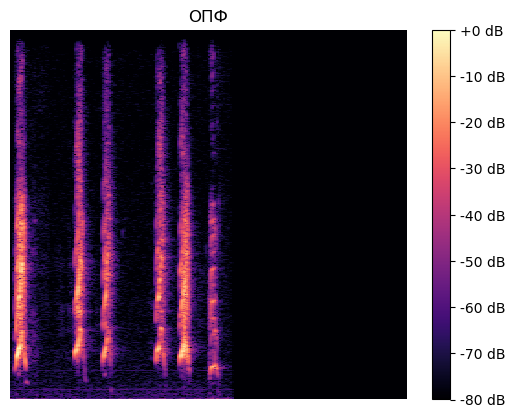

In [40]:
freq = librosa.amplitude_to_db(np.abs(librosa.stft(audio)), ref=np.max)
# print('Название класса', classes[class_index])
print('Размер матрицы ОПФ сигнала:', freq.shape)
plt.axis('off') # no axis
librosa.display.specshow(freq)
plt.colorbar(format='%+2.0f dB')
plt.title('ОПФ')

In [42]:
IPython.display.Audio(audio, rate=fs)

Датасет:

In [36]:
X = features_convolution
y = target

Стратифицированное разбиение на тестовую и тренировочную части. Стратифицированное значит, что количество примеров для каждого из классов одинаково в обучающей и тестовой выборке (по 32 и 8 соответственно).

In [37]:
from sklearn.model_selection import StratifiedShuffleSplit
# Initialize the StratifiedShuffleSplit object
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Split the data into training and testing sets
for train_index, test_index in sss.split(X, y):
    X_train = X[train_index]
    y_train = y[train_index]
    X_test = X[test_index]
    y_test = y[test_index]

print("Size of the training set : ", X_train.shape, y_train.shape )
print("Size of the testing set : ", X_test.shape, y_test.shape  )

#train_df = train_df[['data','target']]
#test_df = test_df[['data','target']]



Size of the training set :  (1600, 1, 1025, 216) torch.Size([1600, 50])
Size of the testing set :  (400, 1, 1025, 216) torch.Size([400, 50])


In [38]:
print("Size of the training set : ", X_train.shape, y_train.shape )
print("Size of the testing set : ", X_test.shape, y_test.shape  )


Size of the training set :  (1600, 1, 1025, 216) torch.Size([1600, 50])
Size of the testing set :  (400, 1, 1025, 216) torch.Size([400, 50])


Далее, подобрать модель и обучить.

попробуем baseline

In [49]:
model3 =nn.Sequential(
    nn.Conv2d(1,16,kernel_size=3,stride=2,padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2,2),

    nn.Conv2d(16,32,kernel_size=3,stride=2,padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2,2),

    nn.Conv2d(32,64,kernel_size=3,stride=2,padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2,2)
)

In [50]:
x = torch.rand(size=(2,1,1025,216), dtype=torch.float32)
output = model3(x)
print(f"Input shape: {x.shape}\n")
#print(f"Output:\n{output}\n\nOutput shape: {output.shape}")
print(f"Output shape: {output.shape}")

Input shape: torch.Size([2, 1, 1025, 216])

Output shape: torch.Size([2, 64, 16, 3])


In [66]:
model = nn.Sequential(
    nn.Conv2d(1,16,kernel_size=3,stride=2,padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2,2),

    nn.Conv2d(16,32,kernel_size=3,stride=2,padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2,2),

    nn.Conv2d(32,64,kernel_size=3,stride=2,padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2,2),

    nn.Flatten(),
    nn.Linear(64*16*3,100),
    nn.Linear(100,50)
)

In [67]:
x = torch.rand(size=(2,1,1025,216), dtype=torch.float32)
x.shape

torch.Size([2, 1, 1025, 216])

In [68]:
output = model(x)
print(f"Input shape: {x.shape}\n")
print(f"Output:\n{output}\n\nOutput shape: {output.shape}")

Input shape: torch.Size([2, 1, 1025, 216])

Output:
tensor([[ 1.6487e-03, -4.4594e-02, -8.3798e-02,  2.6871e-02,  7.7622e-04,
         -4.6545e-02, -1.6384e-02, -6.9367e-02, -8.0343e-02, -7.5889e-02,
         -8.2321e-02,  6.0010e-02,  6.8178e-03, -1.0595e-02, -1.1964e-01,
         -3.6322e-03, -3.0724e-02,  6.3942e-02,  1.3399e-02, -2.8847e-02,
          8.8490e-02,  3.3550e-03,  1.1075e-01,  1.1621e-02, -3.1623e-02,
          8.5746e-02, -4.5727e-03,  1.0513e-01, -1.0580e-02,  2.0145e-02,
         -1.6858e-03, -9.0811e-02, -9.4604e-02,  2.2406e-02, -1.3594e-03,
         -5.4143e-03, -3.4825e-02,  8.0745e-02,  8.5184e-02, -8.3436e-02,
          1.0573e-01, -3.9837e-02, -2.5545e-03,  6.1268e-02,  5.8798e-02,
         -3.1069e-02, -1.4149e-01,  2.9386e-02,  1.3009e-02, -7.4188e-02],
        [ 4.9898e-03, -4.0543e-02, -8.8913e-02,  2.8100e-02,  5.7583e-03,
         -6.0783e-02, -1.7230e-02, -6.3469e-02, -8.7813e-02, -8.0758e-02,
         -8.1648e-02,  5.9068e-02,  3.3305e-03, -9.1187e-03

In [69]:
from torch.utils.data import Dataset, DataLoader

class ESC10Data(Dataset):
    def __init__(self, features, targets):
        self.data = features
        self.y = targets

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.y[idx]

train_data = ESC10Data(X_train, y_train)
test_data = ESC10Data(X_test, y_test)

train_loader = DataLoader(train_data, batch_size=16, shuffle=True)
valid_loader = DataLoader(test_data, batch_size=16, shuffle=True)

In [70]:
if torch.cuda.is_available():
    print("cuda")
    device=torch.device('cuda:0')
else:
    print("cpu")
    device=torch.device('cpu')

model.to(device)

cpu


Sequential(
  (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (7): ReLU()
  (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (9): Flatten(start_dim=1, end_dim=-1)
  (10): Linear(in_features=3072, out_features=100, bias=True)
  (11): Linear(in_features=100, out_features=50, bias=True)
)

In [71]:
import torch.optim as optim
from torch.optim import Adam

learning_rate = 5e-3

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

train_losses = []
valid_losses = []

In [72]:

epochs = 30
for epoch in tqdm(range(1,epochs+1)):
    model.train()
    batch_losses=[]

    for i, data in enumerate(train_loader):
        x, y = data
        optimizer.zero_grad()
        x = x.to(device, dtype=torch.float32)
        y = y.to(device, dtype=torch.float32)
        y_hat = model(x)
        loss = loss_fn(y_hat, y)
        loss.backward()
        batch_losses.append(loss.item())
        optimizer.step()
    train_losses.append(batch_losses)
    print(f'Epoch - {epoch} Train-Loss : {np.mean(train_losses[-1])}')
    model.eval()
    batch_losses=[]
    trace_y = []
    trace_yhat = []
    for i, data in enumerate(valid_loader):
        x, y = data
        x = x.to(device, dtype=torch.float32)
        y = y.to(device, dtype=torch.float32)
        y_hat = model(x)
        loss = loss_fn(y_hat, y)
        trace_y.append(y.cpu().detach().numpy())
        trace_yhat.append(y_hat.cpu().detach().numpy())
        batch_losses.append(loss.item())
    valid_losses.append(batch_losses)
    trace_y = np.concatenate(trace_y)
    trace_yhat = np.concatenate(trace_yhat)
    accuracy = np.mean(trace_yhat.argmax(axis=1)==trace_y.argmax(axis=1))
    print(f'Epoch - {epoch} Valid-Loss : {np.mean(valid_losses[-1])} Valid-Accuracy : {accuracy}')

  0%|          | 0/30 [00:00<?, ?it/s]

Epoch - 1 Train-Loss : 3.6794295716285705


  3%|▎         | 1/30 [00:27<13:07, 27.17s/it]

Epoch - 1 Valid-Loss : 3.3947306537628172 Valid-Accuracy : 0.1375
Epoch - 2 Train-Loss : 3.1765882790088655


  7%|▋         | 2/30 [00:52<12:05, 25.90s/it]

Epoch - 2 Valid-Loss : 2.9432701587677004 Valid-Accuracy : 0.1925
Epoch - 3 Train-Loss : 2.7329798221588133


 10%|█         | 3/30 [01:16<11:25, 25.39s/it]

Epoch - 3 Valid-Loss : 2.5812902879714965 Valid-Accuracy : 0.245
Epoch - 4 Train-Loss : 2.519816191196442


 13%|█▎        | 4/30 [01:42<10:59, 25.37s/it]

Epoch - 4 Valid-Loss : 2.609458999633789 Valid-Accuracy : 0.27
Epoch - 5 Train-Loss : 2.3670633220672608


 17%|█▋        | 5/30 [02:07<10:31, 25.24s/it]

Epoch - 5 Valid-Loss : 2.5094454956054686 Valid-Accuracy : 0.2775
Epoch - 6 Train-Loss : 2.1684701573848724


 20%|██        | 6/30 [02:32<10:03, 25.15s/it]

Epoch - 6 Valid-Loss : 2.2968562269210815 Valid-Accuracy : 0.3275
Epoch - 7 Train-Loss : 2.03897353053093


 23%|██▎       | 7/30 [02:57<09:41, 25.26s/it]

Epoch - 7 Valid-Loss : 2.4053059673309325 Valid-Accuracy : 0.345
Epoch - 8 Train-Loss : 1.9688183295726776


 27%|██▋       | 8/30 [03:23<09:15, 25.26s/it]

Epoch - 8 Valid-Loss : 2.3089896488189696 Valid-Accuracy : 0.38
Epoch - 9 Train-Loss : 1.9062259411811828


 30%|███       | 9/30 [03:48<08:53, 25.42s/it]

Epoch - 9 Valid-Loss : 2.396724500656128 Valid-Accuracy : 0.3525
Epoch - 10 Train-Loss : 1.803034658432007


 33%|███▎      | 10/30 [04:13<08:26, 25.32s/it]

Epoch - 10 Valid-Loss : 2.341180348396301 Valid-Accuracy : 0.355
Epoch - 11 Train-Loss : 1.758575555086136


 37%|███▋      | 11/30 [04:39<08:00, 25.27s/it]

Epoch - 11 Valid-Loss : 2.277951064109802 Valid-Accuracy : 0.3925
Epoch - 12 Train-Loss : 1.6680523532629012


 40%|████      | 12/30 [05:04<07:33, 25.19s/it]

Epoch - 12 Valid-Loss : 2.4795756435394285 Valid-Accuracy : 0.3975
Epoch - 13 Train-Loss : 1.6289347612857819


 43%|████▎     | 13/30 [05:29<07:09, 25.25s/it]

Epoch - 13 Valid-Loss : 2.4721076917648315 Valid-Accuracy : 0.325
Epoch - 14 Train-Loss : 1.5907867938280105


 47%|████▋     | 14/30 [05:55<06:46, 25.38s/it]

Epoch - 14 Valid-Loss : 2.4154163599014282 Valid-Accuracy : 0.375
Epoch - 15 Train-Loss : 1.4724330222606659


 50%|█████     | 15/30 [06:20<06:20, 25.37s/it]

Epoch - 15 Valid-Loss : 2.4625221824645998 Valid-Accuracy : 0.4
Epoch - 16 Train-Loss : 1.4991067707538606


 53%|█████▎    | 16/30 [06:45<05:55, 25.39s/it]

Epoch - 16 Valid-Loss : 2.513909296989441 Valid-Accuracy : 0.3375
Epoch - 17 Train-Loss : 1.4294787275791168


 57%|█████▋    | 17/30 [07:11<05:31, 25.54s/it]

Epoch - 17 Valid-Loss : 2.595765266418457 Valid-Accuracy : 0.3875
Epoch - 18 Train-Loss : 1.352136235833168


 60%|██████    | 18/30 [07:36<05:04, 25.41s/it]

Epoch - 18 Valid-Loss : 2.4484177446365356 Valid-Accuracy : 0.4025
Epoch - 19 Train-Loss : 1.2869121581315994


 63%|██████▎   | 19/30 [08:03<04:41, 25.62s/it]

Epoch - 19 Valid-Loss : 2.5247196054458616 Valid-Accuracy : 0.3575
Epoch - 20 Train-Loss : 1.2642528647184372


 67%|██████▋   | 20/30 [08:28<04:15, 25.52s/it]

Epoch - 20 Valid-Loss : 2.8453584146499633 Valid-Accuracy : 0.39
Epoch - 21 Train-Loss : 1.198512009382248


 70%|███████   | 21/30 [08:53<03:48, 25.39s/it]

Epoch - 21 Valid-Loss : 2.747128715515137 Valid-Accuracy : 0.3825
Epoch - 22 Train-Loss : 1.1783319681882858


 73%|███████▎  | 22/30 [09:18<03:23, 25.39s/it]

Epoch - 22 Valid-Loss : 2.744726510047913 Valid-Accuracy : 0.4075
Epoch - 23 Train-Loss : 1.132131274342537


 77%|███████▋  | 23/30 [09:43<02:57, 25.32s/it]

Epoch - 23 Valid-Loss : 2.734675416946411 Valid-Accuracy : 0.3675
Epoch - 24 Train-Loss : 1.0805278113484382


 80%|████████  | 24/30 [10:09<02:31, 25.32s/it]

Epoch - 24 Valid-Loss : 2.838824429512024 Valid-Accuracy : 0.405
Epoch - 25 Train-Loss : 1.0265266120433807


 83%|████████▎ | 25/30 [10:35<02:07, 25.52s/it]

Epoch - 25 Valid-Loss : 2.9057974433898925 Valid-Accuracy : 0.37
Epoch - 26 Train-Loss : 0.9366967269778251


 87%|████████▋ | 26/30 [11:00<01:41, 25.37s/it]

Epoch - 26 Valid-Loss : 2.9666240882873534 Valid-Accuracy : 0.425
Epoch - 27 Train-Loss : 0.9348313203454017


 90%|█████████ | 27/30 [11:25<01:16, 25.40s/it]

Epoch - 27 Valid-Loss : 3.232208070755005 Valid-Accuracy : 0.37
Epoch - 28 Train-Loss : 0.8846528699994087


 93%|█████████▎| 28/30 [11:50<00:50, 25.29s/it]

Epoch - 28 Valid-Loss : 3.4527437257766724 Valid-Accuracy : 0.3525
Epoch - 29 Train-Loss : 0.8653911194205284


 97%|█████████▋| 29/30 [12:15<00:25, 25.25s/it]

Epoch - 29 Valid-Loss : 3.3488346481323243 Valid-Accuracy : 0.2825
Epoch - 30 Train-Loss : 0.8840688306093216


100%|██████████| 30/30 [12:41<00:00, 25.39s/it]

Epoch - 30 Valid-Loss : 3.2617089557647705 Valid-Accuracy : 0.375


# ЗАДАЧА 3

Разработать полосно-заграждающий КИХ-фильтр для удаления шума одной частоты из аудио-сигнала. Подгрузим сигнал.
Для того, чтобы качество очищения от шума можно было услышать, добавим шум на частоте, например, 500 Гц.

In [73]:
from scipy.io import wavfile

import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft, fftshift, rfft
from scipy import signal
import IPython

def myDFT_AmplPlot(t, x, N=512, fs = False, xLim = 0.5):
    
    if len(x)>512:
        N = len(x)
        
    xFFT = fftshift(fft(x, N))
    # Амплитуда спектра
    xA = np.abs(xFFT)

    xList = [x, xA]
    titles = ['Сигнал', 'Спектр']

    # Графики
    plt.figure(figsize=(12, 6))
    for i, sig in enumerate(xList):
        plt.subplot(2, 2, i+1)
        plt.title(titles[i])
        if i == 0:
            plt.plot(t, sig)
            plt.xlabel('Временные отсчёты')
            #plt.xlim([-0.25, len(x)-0.75])
        else:
            if fs == False:
                plt.plot(np.arange(-np.floor(N/2), np.floor((N+1)/2))/N,sig)
                plt.xlabel('Частотные отсчёты')
                plt.xlim([0, xLim])
                plt.xticks(np.linspace(0, xLim, 11))
            else:
                plt.plot(fs*np.arange(-np.floor(N/2), np.floor((N+1)/2))/N,sig)
                plt.xlabel('Частоты')
                plt.xlim([0, fs*xLim])
                plt.xticks(np.linspace(0, fs*xLim, 11))
        plt.grid()
    plt.tight_layout()

In [74]:
fs, data = wavfile.read('source/LetsGo.wav')
data = data/np.max(data)

C:\Users\aleksandr\AppData\Local\Temp\1\ipykernel_3660\1012417652.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, data = wavfile.read('source/LetsGo.wav')


In [75]:
IPython.display.Audio(data, rate=fs)

In [76]:
w = 500
t = np.arange(0,len(data)) / fs
noise = np.sin(2*np.pi*w*t)
y_noised = data + 0.75*noise

IPython.display.Audio(y_noised, rate=fs)

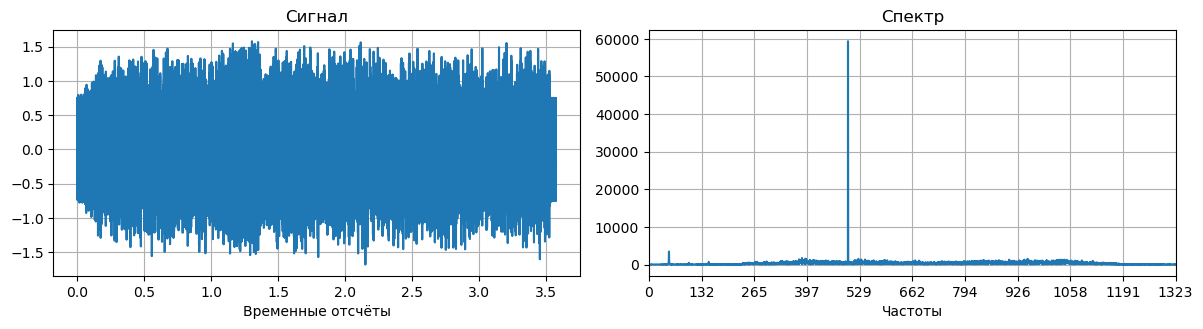

In [77]:
myDFT_AmplPlot(t, y_noised, fs = fs, xLim=0.03)

Создать фильтр одним из способов

    signal.remez()
    signal.firls()
    signal.firwin()

In [145]:
def plot_response(w, h, fs, title):
    plt.figure(figsize=(5,2))
    plt.plot(w, 10*np.log10(np.abs(h)))
    plt.ylim(-40, 10)
    plt.xlim(0, 0.5*fs)
    plt.grid(True)
    plt.xlabel('Частота')
    plt.ylabel('Амплитуда (дБ)')
    plt.title(title)

In [146]:
fs

44100

(0.0, 2205.0)

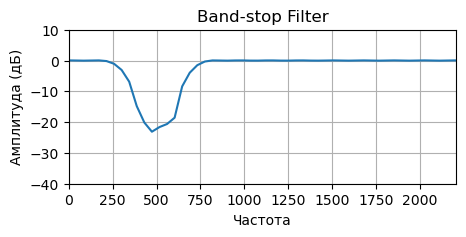

In [209]:
w = 500

# полосно-заграждающий фильтр в целом работает, но гармонику на частоте 500Гц подавляет не до конца.
edges = [0, 200, 400, 600, 800, 0.5*fs]
numtaps = 501      # число коэффициентов фильтра
bs_filter = signal.remez(numtaps, edges, [1, 0, 1], fs=fs)

# в данном случае гораздо лучше показывает себя фильтр высоких частот
edges = [0, 500, 800, 0.5*fs]
numtaps = 501      # число коэффициентов фильтра
hp_filter = signal.remez(numtaps, edges, [0, 1], fs=fs)


w_bs, h_bs = signal.freqz(bs_filter, [1], fs=fs)
w_hp, h_hp = signal.freqz(hp_filter, [1], fs=fs)


plot_response(w_bs, h_bs, fs, "Band-stop Filter")
plt.xlim(0, 0.05*fs)

(0.0, 2205.0)

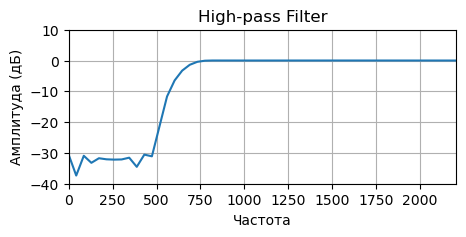

In [211]:
plot_response(w_hp, h_hp, fs, "High-pass Filter")
plt.xlim(0, 0.05*fs)

Провести фильтрацию сигнала...

In [215]:
y_filt_bs = signal.lfilter(bs_filter,[1],y_noised)
y_filt_hp = signal.lfilter(hp_filter,[1],y_noised)


Text(0.5, 1.0, 'BS filter')

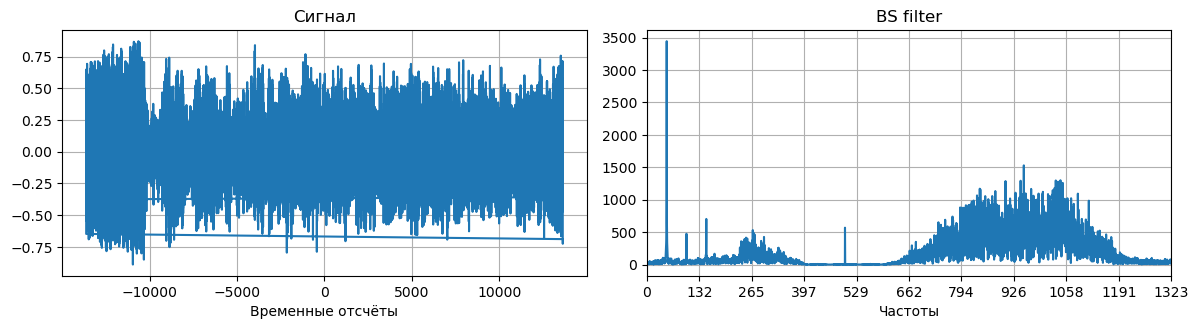

In [218]:
# график отфильтрованного сигнала
myDFT_AmplPlot(t, y_filt_bs, fs = fs, xLim=0.03)
plt.title("BS filter")

Text(0.5, 1.0, 'HP filter')

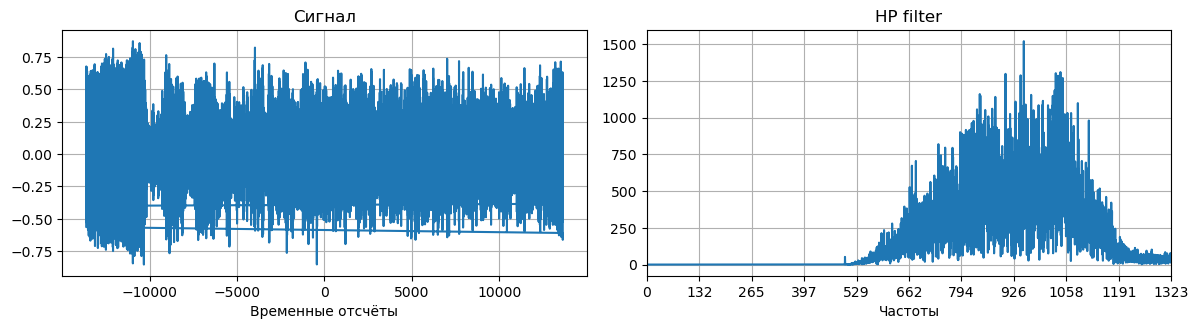

In [219]:
# график отфильтрованного сигнала
myDFT_AmplPlot(t, y_filt_hp, fs = fs, xLim=0.03)
plt.title("HP filter")


# Фильтр высоких частот значительно лучше очистил сигнал от низкочастотных шумов

Сравнение спектров исходного сигнала и отфильтрованного.

(0.0, 2205.0)

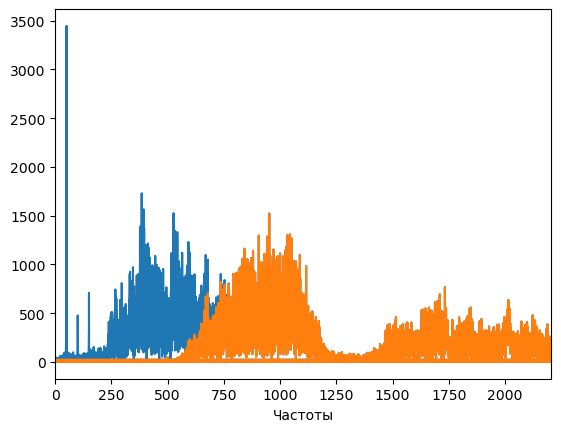

In [224]:
yFFT = np.abs(fft(y_filt_hp))
dataFFT = np.abs(fft(data))
N = len(yFFT)
sig = np.array([dataFFT, yFFT]).T
t= np.arange(N)*fs/N

plt.plot(t,sig)
plt.xlabel('Частоты')
plt.xlim([0, fs*0.05])

### беглый поиск в интернте подсказывает, что типичный мужской голос имеет фундаментальную частоту 85-155Гц, которую мы вырезали, но за счет обертонов полезный сигнал все равно различим.

In [227]:
# ВЧ фильтр
IPython.display.Audio(y_filt_hp, rate=fs)

In [229]:
# полосно-заградительный фильтр для сравнения. Гармонические колебания на частоте 500Гц все еще различимы.
IPython.display.Audio(y_filt_bs, rate=fs)

# Задача 4

Напишите код для генерации звучания ноты по заданной частоте в герцах и длительности в секундах с помощью фильтра Карплюса-Стронга. 

In [ ]:
from random import random
from scipy.io.wavfile import write
from scipy.signal import lfilter, freqz

import numpy as np
import matplotlib.pyplot as plt
import IPython.display as display

# получение коэффициентов фильтра Карплюса-Стронга
def get_KS_filter(M, alpha):
    b = np.array([1]) 
    a = np.array([1] + ([0]*(M-1)) + [-alpha]) 
    return b,a   

In [ ]:
# код для генерации ноты
def get_note(freq, dur, fs):    
    ...
    return sig 

In [ ]:
Далее, для формирования мелодии по списку нот (или частот) удобно написать специальный метод:

In [ ]:
def get_melody(melody, fs):
    dur = 0.5
    x = []
    for note in melody:
        x = x + list(get_note(note, dur, fs))        
    
    return np.array(x)

Сформируем некоторую мелодию.


In [ ]:
notes = ['A', 'A#', 'Bb', 'B', 'C', 'C#', 'Db', 'D', 'D#', 'Eb', 'E', 'F', 'F#', 'Gb', 'G', 'G#', 'Ab']
valueSet = [0,1,1,2,3,4,4,5,6,6,7,8,9,9,10,11,11]

noteDict = dict(zip(notes, valueSet))

song = ['A','A','E','E' ,'F#' ,'F#','E', 'E', 'D','D', 'C#','C#','B','B','A']

melody = [440 * 2 ** (noteDict[note]/12) for note in song]

In [ ]:
x = get_melody(melody, fs)

display.Audio(x, rate=44100, embed=True)

 # Задача 5
 
 В файле `LMS on.ipynb` был реализован LMS алгоритм для фильтрации сигнала. 
 
 Требуется решить ту же задачу фильтрации сигнала с помощью фильтра Винера.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Создаём сигнал
t = np.linspace(0,1,10000, endpoint = False)
# желаемый сигнал
desired = np.sin(2*np.pi*20*t)
# сигнал на входе
sig = desired + 0.5*np.random.randn(len(desired)) + np.sin(2*np.pi*80*t)

plt.plot(t,sig)

In [ ]:
X_train = sig[:int(len(sig) * 0.8)]
X_test = sig[int(len(sig) * 0.8):]

Y_train = desired[:int(len(desired) * 0.8)]
Y_test = desired[int(len(desired) * 0.8):]

Найти коэффициенты фильтра Винера, решением СЛАУ, где значения матрицы и вектора получены с помощью корреляций.

In [ ]:
...
weiner_coefs= ...

In [ ]:
w,h = freqz(weiner_coefs, [1], fs=10000) 

def plot_response(w, h, fs, title):
    plt.figure(figsize=(5,2))
    plt.plot(w, 10*np.log10(np.abs(h)))
    plt.ylim(-40, 5)
    plt.xlim(0, 0.5*fs)
    plt.grid(True)
    plt.xlabel('Частота')
    plt.ylabel('Амплитуда (дБ)')
    plt.title(title)
    
plot_response(w, h, 10000, "НЧ фильтр")
plt.xlim(0, 0.05*10000)

In [ ]:
from scipy.signal import lfilter
s_hat = lfilter(weiner_coefs,[1],X_test)

In [ ]:
plt.plot(Y_test)
plt.plot(s_hat)